# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Alfi Nazilah
- Email: alfinazilah2611@gmail.com
- Id Dicoding: alfinazilah

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim terhadap penyewaan sepeda?
- Bagaimana tren penyewaan sepeda dalam tahun, bulan dan jam?
- Bagaimana pengaruh hari libur dan hari kerja terhadap penyewaan sepeda?
- Bagaimana pengaruh cuaca terhadap penyewaan sepeda?
- Bagaimana pengaruh temperatur (suhu) terhadap penyewaan sepeda?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Memuat tabel day

In [2]:
day_df = pd.read_csv("https://raw.githubusercontent.com/alfigrace/Dicoding-BADDP-Proyek-Analisis-Data/main/submission/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Memuat tabel hour

In [3]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/alfigrace/Dicoding-BADDP-Proyek-Analisis-Data/main/submission/data/hour.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

Menilai data day_df

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Berdasarkan hasil di atas, terdapat kesalahan tipe data pada kolom dteday berupa object yang seharusnya datetime

Mengecek missing value pada data day_df

In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Berdasarkan hasil pengecekan, tidak terdapat missing value pada data day_df

Mengecek duplikasi data pada day_df

In [6]:
print("Jumlah duplikasi pada day_df: ", day_df.duplicated().sum())

Jumlah duplikasi pada day_df:  0


Berdasarkan hasil pengecekan, tidak terdapat duplikasi data pada day_df

Mengecek paramter statistik pada day_df

In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Berdasarkan hasil di atas, tidak ditemukan parameter statistik yang tidak sesuai dengan kolomnya

Menilai data hour_df

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Berdasarkan hasil di atas, terdapat kesalahan tipe data pada kolom dteday berupa object yang seharusnya datetime

Mengecek missing value pada data hour_df

In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Berdasarkan hasil pengecekan, tidak terdapat missing value pada data hour_df

Mengecek duplikasi data pada hour_df

In [10]:
print("Jumlah duplikasi pada hour_df: ", hour_df.duplicated().sum())

Jumlah duplikasi pada hour_df:  0


Berdasarkan hasil pengecekan, tidak terdapat duplikasi data pada hour_df

Mengecek parameter statistik pada hour_df

In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Berdasarkan hasil di atas, tidak ditemukan parameter statistik yang tidak sesuai dengan kolomnya

### Cleaning Data

Memperbaiki tipe data dteday pada day_df menjadi datetime

In [12]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [13]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Memperbaiki tipe data dteday pada hour_df menjadi datetime

In [14]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [15]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore day_df

In [16]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
292,293,2011-10-20,4,0,10,0,4,1,1,0.475833,0.466525,0.636250,0.422275,471,3724,4195
65,66,2011-03-07,1,0,3,0,1,1,1,0.261739,0.238461,0.551304,0.341352,244,1628,1872
178,179,2011-06-28,3,0,6,0,2,1,1,0.744167,0.692558,0.634167,0.144283,732,3916,4648
429,430,2012-03-05,1,1,3,0,1,1,1,0.243333,0.241171,0.506250,0.228858,203,3130,3333
277,278,2011-10-05,4,0,10,0,3,1,1,0.538333,0.527138,0.647917,0.177250,559,4267,4826


In [17]:
day_df.describe(include="all")

<ipython-input-17-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


In [18]:
day_df.loc[day_df["season"] == 1, "season"] = "Spring"
day_df.loc[day_df["season"] == 2, "season"] = "Summer"
day_df.loc[day_df["season"] == 3, "season"] = "Fall"
day_df.loc[day_df["season"] == 4, "season"] = "Winter"

day_df.season.value_counts().sort_index(ascending=False)

Winter    178
Summer    184
Spring    181
Fall      188
Name: season, dtype: int64

In [19]:
day_df.loc[day_df["yr"] == 0, "yr"] = "2011"
day_df.loc[day_df["yr"] == 1, "yr"] = "2012"

day_df.yr.value_counts().sort_index()

2011    365
2012    366
Name: yr, dtype: int64

In [20]:
day_df.mnth.value_counts().sort_index()

1     62
2     57
3     62
4     60
5     62
6     60
7     62
8     62
9     60
10    62
11    60
12    62
Name: mnth, dtype: int64

In [21]:
day_df.loc[day_df["holiday"] == 0, "holiday"] = "Holiday"
day_df.loc[day_df["holiday"] == 1, "holiday"] = "Not a holiday"

day_df.holiday.value_counts().sort_index()

Holiday          710
Not a holiday     21
Name: holiday, dtype: int64

In [22]:
day_df.loc[day_df["weekday"] == 0, "weekday"] = "Sun"
day_df.loc[day_df["weekday"] == 1, "weekday"] = "Mon"
day_df.loc[day_df["weekday"] == 2, "weekday"] = "Tue"
day_df.loc[day_df["weekday"] == 3, "weekday"] = "Wed"
day_df.loc[day_df["weekday"] == 4, "weekday"] = "Thu"
day_df.loc[day_df["weekday"] == 5, "weekday"] = "Fri"
day_df.loc[day_df["weekday"] == 6, "weekday"] = "Sat"

day_df.weekday.value_counts().sort_index()

Fri    104
Mon    105
Sat    105
Sun    105
Thu    104
Tue    104
Wed    104
Name: weekday, dtype: int64

In [23]:
day_df.loc[day_df["workingday"] == 0, "workingday"] = "Holiday"
day_df.loc[day_df["workingday"] == 1, "workingday"] = "Working Day"

day_df.workingday.value_counts().sort_index()

Holiday        231
Working Day    500
Name: workingday, dtype: int64

In [24]:
day_df.loc[day_df["weathersit"] == 1, "weathersit"] = "Clear"
day_df.loc[day_df["weathersit"] == 2, "weathersit"] = "Mist"
day_df.loc[day_df["weathersit"] == 3, "weathersit"] = "Light snow"
day_df.loc[day_df["weathersit"] == 4, "weathersit"] = "Heavy rain"

day_df.weathersit.value_counts().sort_index()

Clear         463
Light snow     21
Mist          247
Name: weathersit, dtype: int64

### Explore hour_df

In [25]:
hour_df.hr.value_counts().sort_index()

0     726
1     724
2     715
3     697
4     697
5     717
6     725
7     727
8     727
9     727
10    727
11    727
12    728
13    729
14    729
15    729
16    730
17    730
18    728
19    728
20    728
21    728
22    728
23    728
Name: hr, dtype: int64

In [26]:
hour_df.loc[hour_df["weathersit"] == 1, "weathersit"] = "Clear"
hour_df.loc[hour_df["weathersit"] == 2, "weathersit"] = "Mist"
hour_df.loc[hour_df["weathersit"] == 3, "weathersit"] = "Light Snow"
hour_df.loc[hour_df["weathersit"] == 4, "weathersit"] = "Heavy Rain"

hour_df.weathersit.value_counts().sort_index()

Clear         11413
Heavy Rain        3
Light Snow     1419
Mist           4544
Name: weathersit, dtype: int64

## Visualization & Explanatory Analysis

### Bagaimana pengaruh musim terhadap penyewaan sepeda?

In [27]:
byseason_df = day_df.groupby(by="season").instant.nunique().reset_index()
byseason_df.rename(columns={
    "instant": "sum"
}, inplace=True)
byseason_df

,season,sum
0,Fall,188
1,Spring,181
2,Summer,184
3,Winter,178


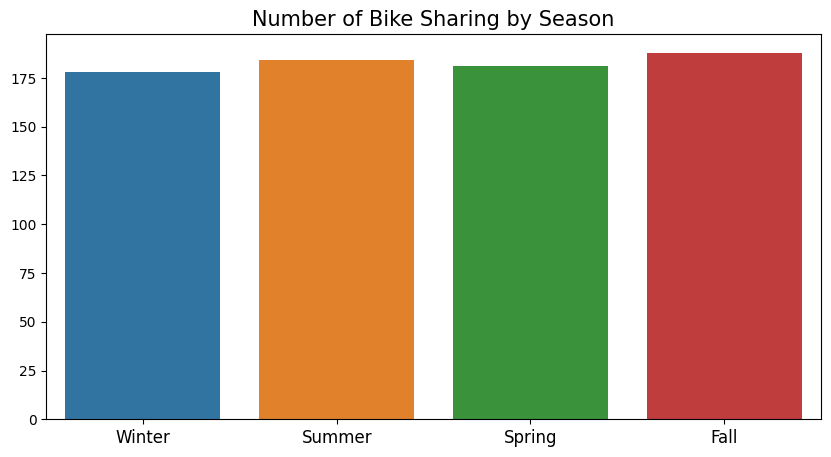

In [28]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="sum",
    x="season",
    data=byseason_df.sort_values(by="season", ascending=False)
)
plt.title("Number of Bike Sharing by Season", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

### Bagaimana tren penyewaan sepeda dalam tahun, bulan dan jam?

In [29]:
byyear_df = day_df.groupby(by="yr").instant.nunique().reset_index()
byyear_df.rename(columns={
    "instant": "sum"
}, inplace=True)
byyear_df

,yr,sum
0,2011,365
1,2012,366


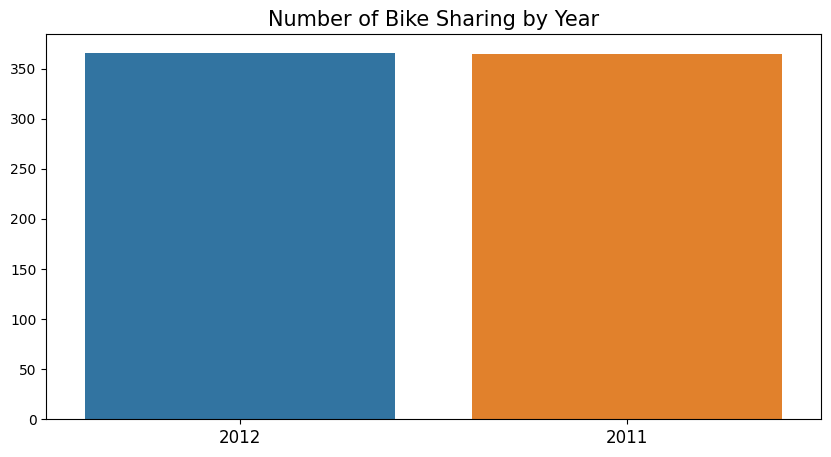

In [30]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="sum",
    x="yr",
    data=byyear_df.sort_values(by="yr", ascending=False),
)
plt.title("Number of Bike Sharing by Year", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

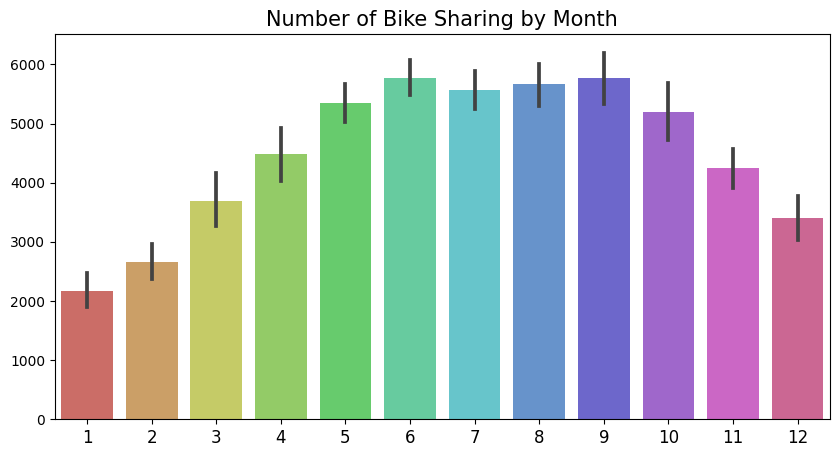

In [31]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="cnt",
    x="mnth",
    data=day_df.sort_values(by="mnth", ascending=False),
    palette="hls"
)
plt.title("Number of Bike Sharing by Month", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

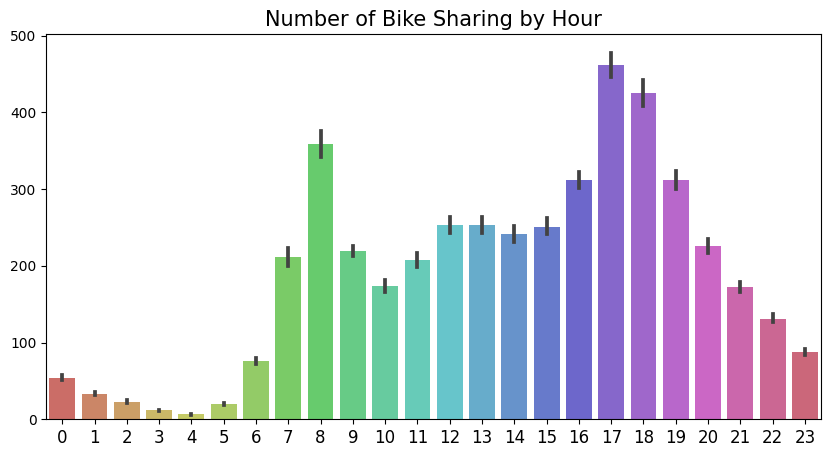

In [32]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="cnt",
    x="hr",
    data=hour_df.sort_values(by="hr", ascending=False),
    palette="hls"
)
plt.title("Number of Bike Sharing by Hour", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

### Bagaimana pengaruh hari libur dan hari kerja terhadap penyewaan sepeda?

In [33]:
byholiday_df = day_df.groupby(by="holiday").instant.nunique().reset_index()
byholiday_df.rename(columns={
    "instant": "sum"
}, inplace=True)
byholiday_df

,holiday,sum
0,Holiday,710
1,Not a holiday,21


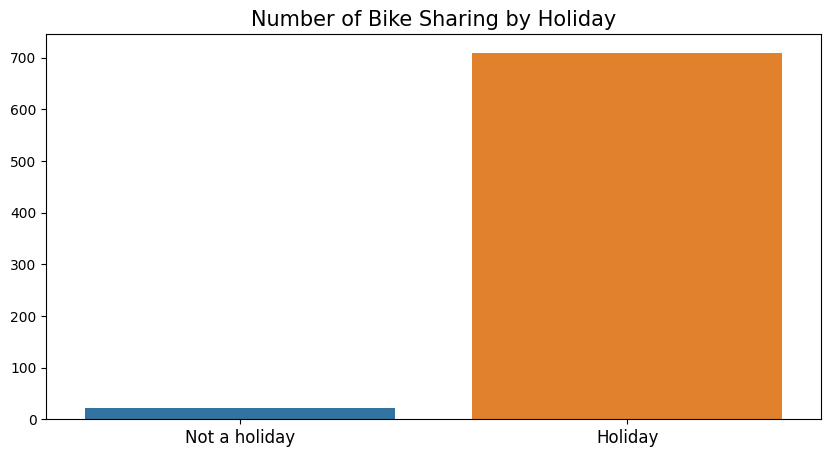

In [34]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="sum",
    x="holiday",
    data=byholiday_df.sort_values(by="holiday", ascending=False),
)
plt.title("Number of Bike Sharing by Holiday", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

In [35]:
byworkingday_df = day_df.groupby(by="workingday").instant.nunique().reset_index()
byworkingday_df.rename(columns={
    "instant": "sum"
}, inplace=True)
byworkingday_df

,workingday,sum
0,Holiday,231
1,Working Day,500


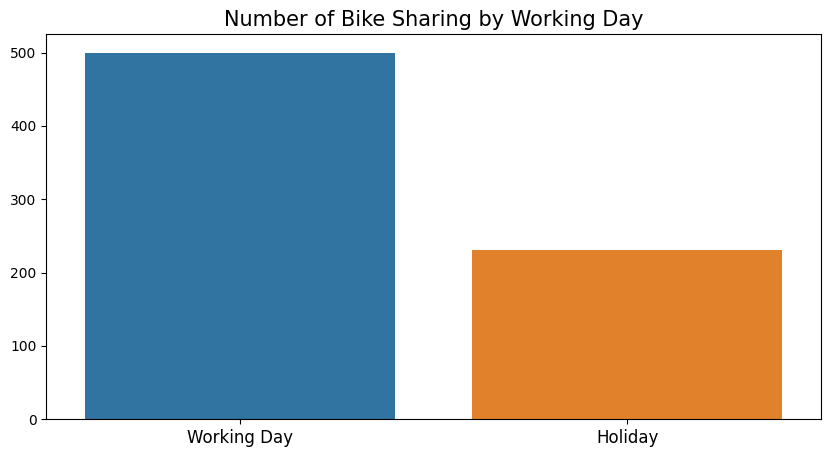

In [36]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="sum",
    x="workingday",
    data=byworkingday_df.sort_values(by="workingday", ascending=False),
)
plt.title("Number of Bike Sharing by Working Day", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

### Bagaimana pengaruh cuaca terhadap penyewaan sepeda?

In [37]:
byweathersit_df = day_df.groupby(by="weathersit").instant.nunique().reset_index()
byweathersit_df.rename(columns={
    "instant": "sum"
}, inplace=True)
byweathersit_df

,weathersit,sum
0,Clear,463
1,Light snow,21
2,Mist,247


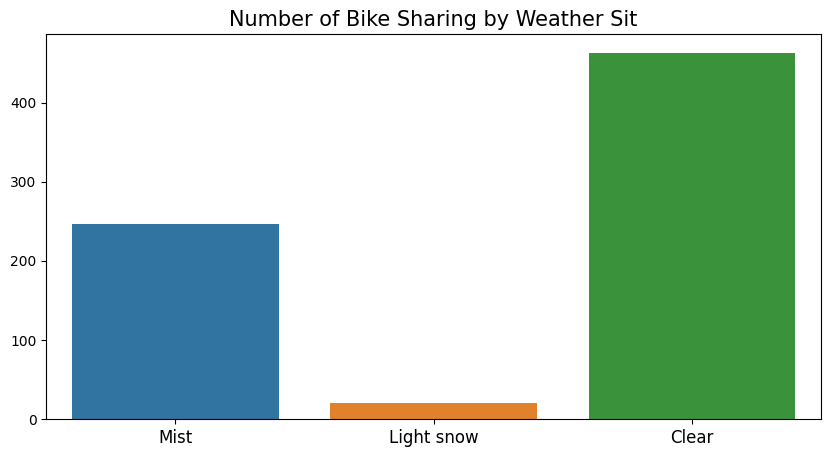

In [38]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="sum",
    x="weathersit",
    data=byweathersit_df.sort_values(by="weathersit", ascending=False),
)
plt.title("Number of Bike Sharing by Weather Sit", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

### Bagaimana pengaruh temperatur (suhu) terhadap penyewaan sepeda?

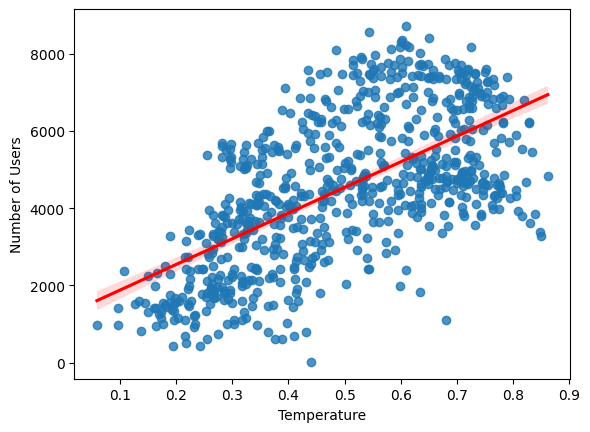

In [39]:
sns.regplot(
    x=day_df["temp"],
    y=day_df["cnt"],
    line_kws={"color": "r"})
plt.xlabel("Temperature")
plt.ylabel("Number of Users")
plt.show()

## Conclusion

- Berdasarkan hasil pengamatan pada tabel byseason_df pada kolom season dan sum, banyaknya penyewaan sepeda terjadi pada musim fall (gugur). Dapat disimpulkan bahwa musim fall (gugur) berpengaruh terhadap penyewaan sepeda.
- 1. Berdasarkan hasil pengamatan pada tabel byyear_df pada kolom yr dan sum, tren penyewaan sepeda paling banyak di tahun 2012. Dapat disimpulkan bahwa tren penyewaan sepeda paling banyak pada tahun 2012.
- 2. Berdasarkan hasil pengamatan pada tabel bymonth_df pada kolom mnth dan sum, tren penyewaan sepeda paling banyak di bulan 6 (Juni). Dapat disimpulkan bahwa tren penyewaan sepeda paling banyak pada bulan Juni.
- 3. Berdasarkan hasil pengamatan pada tabel byhour_df pada kolom hr dan sum, tren penyewaaan sepeda paling banyak di jam 17. Dapat disimpulkan bahwa tren penyewaan sepeda paling banyak di jam 17.
- 1. Berdasarkan hasil pengamatan pada tabel byholiday_df, banyaknya penyewaan sepeda terjadi pada hari libur. Dapat disimpulkan bahwa hari libur berpengaruh terhadap penyewaan sepeda.
- 2. Berdasarkan hasil pengamatan pada tabel byworkingday_df, banyaknya penyewaan sepeda terjadi pada hari kerja. Dapat disimpulkan bahwa hari kerja berpengaruh terhadap penyewaan sepeda.
- Berdasarkan hasil pengamatan pada tabel byweathersit_df, banyaknya penyewaan sepeda terjadi saat cuaca clear (cerah). Dapat disimpulkan bahwa cuaca berpengaruh terhadap penyewaan sepeda.
- Berdasarkan hasil pengamatan dari tabel day_df pada kolom cnt dan temp yang divisualisaikan menggunakan regplot, dapat dilihat ada hubungan antara jumlah penyewa dengan suhu. Semakin hangat suhu, semakin banyak pula sepeda yang disewa.

## Export dataset

In [44]:
day_df.to_csv("main_data.csv", index=False)